<h1 align='center' >Task 1: Graduate Admissions Prediction</h1>

<h3 align='right' style='color:green'>Venkat Revanth Thota</h3>

# Problem Statement

Use classification technique for prediction of Graduate Admissions from an Indian perspective.

__Content:__ The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

__Models:__
1. Logistic Regression
2. Random Forest
3. Support Vector Machine

## 1. Load libraries and data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


__Observations:__
1. Column names has spaces and some unnecessary spaces.
2. Column names have upper case characters.
3. `Serial No.` column name has a '.' sign.
4. So we remove/correct these for easy access and to reduce chance of errors due typing mistakes.

In [3]:
df_col = df.columns.to_list()
df_col

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [4]:
df_col[0] = df_col[0].replace('.','')

for i in range(len(df_col)):
    df_col[i] = df_col[i].lower().strip().replace(' ','_')

df_col

['serial_no',
 'gre_score',
 'toefl_score',
 'university_rating',
 'sop',
 'lor',
 'cgpa',
 'research',
 'chance_of_admit']

In [5]:
df.columns = df_col
df.columns

Index(['serial_no', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor', 'cgpa', 'research', 'chance_of_admit'],
      dtype='object')

* Column names have been optimized

__Let's check the data types of each column__

In [6]:
df.dtypes

serial_no              int64
gre_score              int64
toefl_score            int64
university_rating      int64
sop                  float64
lor                  float64
cgpa                 float64
research               int64
chance_of_admit      float64
dtype: object

__Let's check the Null values of each column__

In [7]:
df.isnull().sum()

serial_no            0
gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

__Observations:__
* No Null values in the entire data set

## 2. Data Exploration

__Statical description of each attribute__

In [8]:
df.describe()

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


These statistics provide a summary of the dataset. Note that they're only applicable to the numerical columns. Here's what you can gather from this information:

* The count of rows, which matches what we saw in the shape attribute.
* The average (mean) value.
* The middle value (median), often used to understand data skewness.
* The degree of data spread (standard deviation).
* The lowest and highest values in each column.
* The count of items within the first, second, and third percentiles.

Moving on, let's analyze how the chance of admission among subjects is distributed in the data. We'll also explore how the rating impacts the likelihood of admission.

In [9]:
df.groupby(by = 'university_rating').mean()

,serial_no,gre_score,toefl_score,sop,lor,cgpa,research,chance_of_admit
university_rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


People who applied to programs with a rating of 1 have a lower chance of getting admitted compared to those who applied to programs with better ratings.

Now, let's take a closer look at individuals who have a greater than 82% chance of admission.

In [10]:
df[df.chance_of_admit > 0.82].groupby('chance_of_admit').mean()

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
chance_of_admit,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


__Observations:__

* People with a higher likelihood of admission tend to have CGPAs above 9, while the overall data average is 8.57.
* The average grades for LOR, SOP, GRE, and TOEFL are higher among individuals with better chances of admission compared to the overall data average.
* It's worth mentioning that having research experience is important, with 75% of successful applicants having it. However, having more than 83% research experience might be a crucial factor in avoiding application rejection in the next round.

## 3. Data Visualization

### 3.1 Histogram of Admission Chances

Let's create visualizations to better understand the data and its important features. Visualizations can often provide a clearer picture of trends and patterns.

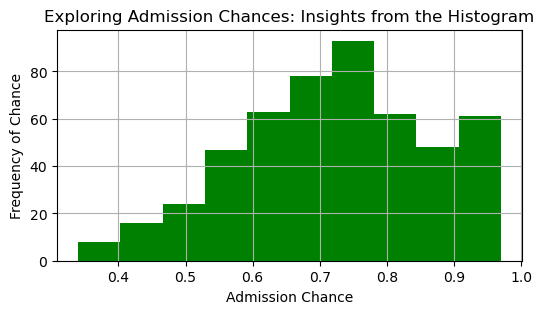

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.hist(df['chance_of_admit'],bins=10, color='green')
plt.title('Exploring Admission Chances: Insights from the Histogram')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.grid()
plt.show()

The Histogram reveals a pleasingly even distribution of the 'chance of admission' column throughout the dataset.

### 3.2 Line Plot for Research Output and The Chance of Admission

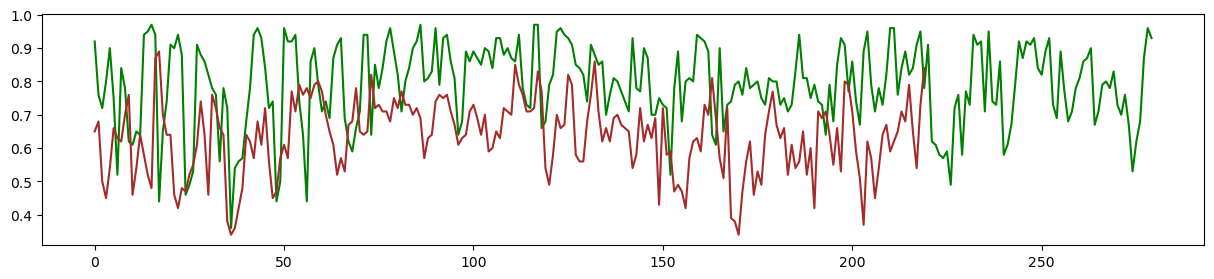

In [12]:
plt.figure(figsize=(15,3))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance_of_admit'], color = 'green')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance_of_admit'], color = 'brown')
plt.show()

Admission likelihood is significantly influenced by research output. This suggests that research could serve as a valuable predictor for outcomes.

### 3.3 Scatter Plot of University Rating and The Chance of Admission

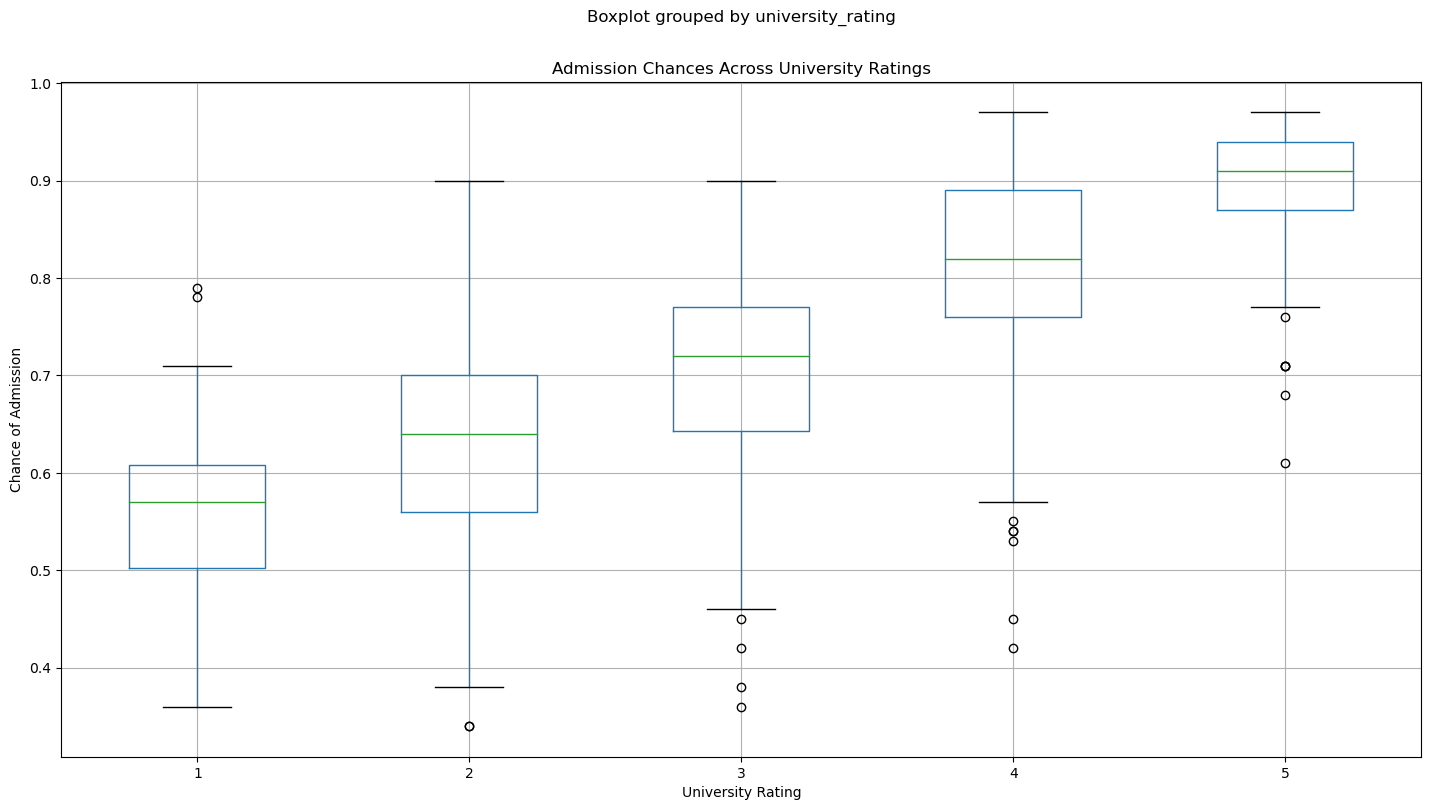

In [13]:
df.boxplot(column='chance_of_admit',by='university_rating',figsize=(17,9))
plt.title('Admission Chances Across University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

### 3.4 Histogram of Numeric Variables

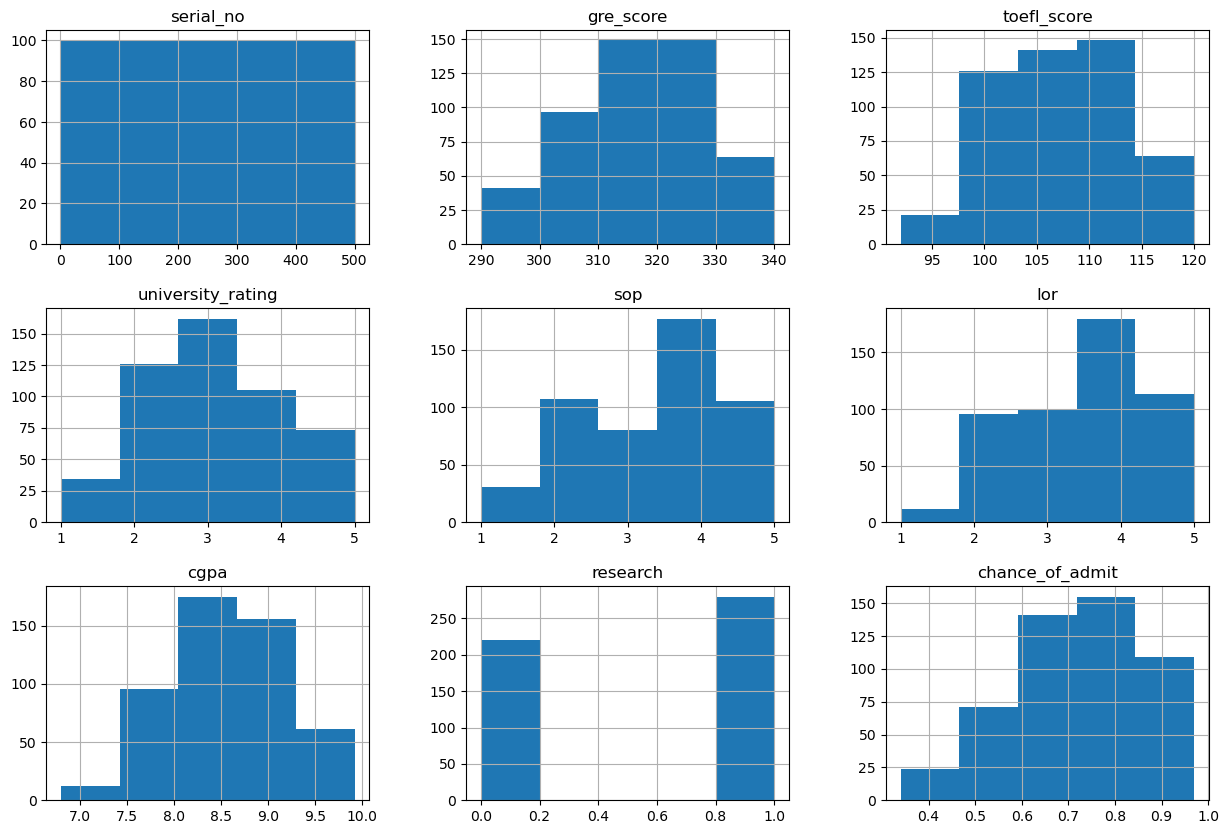

In [14]:
df.hist(bins=5, figsize=(15,10))
plt.show()

In [15]:
df.dtypes

serial_no              int64
gre_score              int64
toefl_score            int64
university_rating      int64
sop                  float64
lor                  float64
cgpa                 float64
research               int64
chance_of_admit      float64
dtype: object

## 4. Data Preparation
Based on the Data Preprocessing section above, it's clear that our graduate admission data consists solely of numerical variables. As we move towards model development, we only need to focus on the following tasks:

1. The 'chance' variable becomes the outcome, with other features as predictors.
2. The 'no' variable, which simply serves as an instance indicator (akin to an ID column), can be safely omitted from the dataset.

In [16]:
df.drop(['serial_no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance_of_admit']
x=[i for i in var if i not in ['chance_of_admit']]
x=df[x]

The data will be divided using the `train_test_split` module from the _scikit-learn_ library.

For this split, a ratio of 20% will be allocated to the test data, ensuring a well-balanced division.

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)


Normalizing data is crucial to ensure data is presented on consistent scales for meaningful comparisons.

In [18]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

Utilizing the __MIN-MAX__ Scaler is a recommended practice to enhance accuracy. Employing appropriate scaling methods consistently leads to improved model performance.

## 5. Unveiling Classification Models & In-Depth Analysis

To construct classification models, the classification outcome is defined as 'status', marked as True for applicants with over 83% chance of admission. This threshold, set at the third quartile, was selected due to the notably high median of the chance data, which stands at 72%.

In [19]:
import numpy as np
cy_train=[1 if chance_of_admit > 0.83 else 0 for chance_of_admit in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance_of_admit > 0.83 else 0 for chance_of_admit in y_test]
cy_test=np.array(cy_test)

### 5.1 Logistic Regression

Logistic regression accuracy: 0.960
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



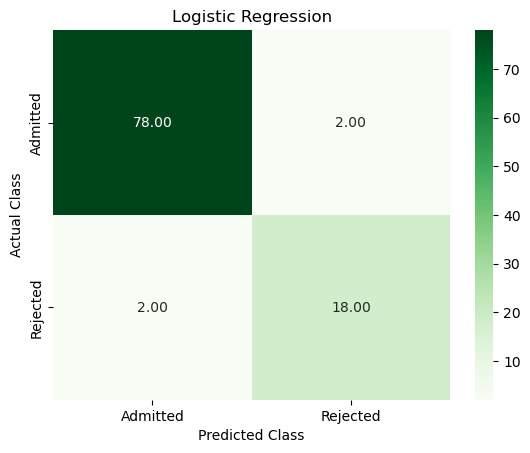

In [20]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('-'*60)
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"], cmap='Greens')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

### 5.2 Random Forest

Random Forest Accuracy: 0.980
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.95      0.95      0.95        20

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



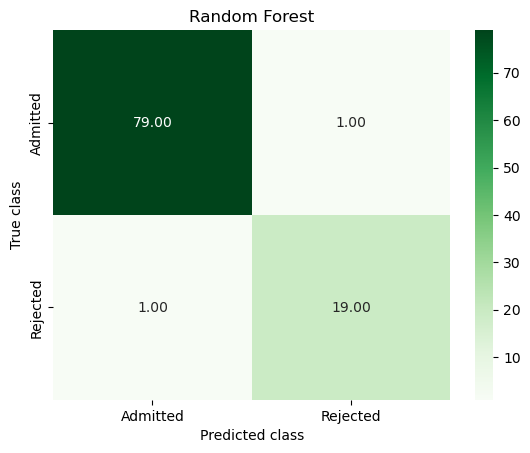

In [21]:
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('-'*60)
print(classification_report(cy_test, rf.predict(x_test)))

cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"], cmap='Greens')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

### 5.3 Suport Vector Machine

Support vector machine accuracy: 0.970
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.95      0.90      0.92        20

    accuracy                           0.97       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.97      0.97      0.97       100



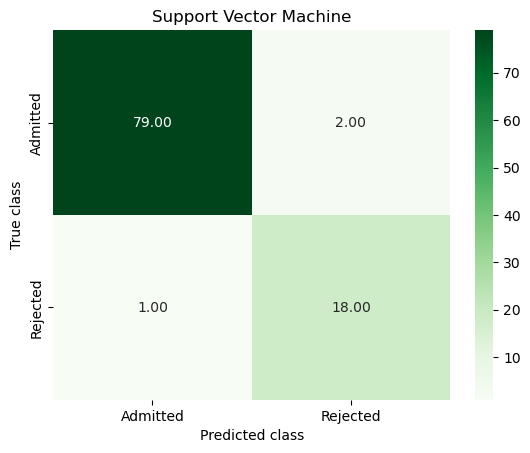

In [22]:
# Fitting support vector machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('-'*60)
print(classification_report(cy_test, svc.predict(x_test)))

cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"], cmap='Greens')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

Let's gauge how accurately our classifier predicts admitted students. This measure is called 'recall'. From the visuals, it's evident that logistic regression and support vector machine models shine here. Among 20 truly admitted applicants, LR and SVM get 18 correct, achieving around 90% recall.

Next, how well does our classifier predict students who will be admitted? This is termed 'precision'. Among 18 predicted admitted students, Random Forest edges ahead with 17 accurate predictions.

Interestingly, all classifiers exhibit an identical accuracy score of 96%.

## 6. Unveiling Key Features: Random Forest Model's Feature Importance

To uncover the pivotal factors influencing college admission, we turn to the random forest classifier. This model reveals the most significant features that contribute to whether an applicant secures admission.

In [23]:
f_imp = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)

cgpa                 0.413057
gre_score            0.186773
toefl_score          0.184167
sop                  0.082717
university_rating    0.071015
lor                  0.046049
research             0.016221
dtype: float64
